In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import squarify
import missingno as msno
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
import warnings
warnings.filterwarnings('ignore')


In [6]:
air = '/home/debargha/Documents/ClimateWatcher/data.csv'
df = pd.read_csv(air, engine='python')
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [8]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [9]:
df.rename(columns={'stn_code': 'station_code', 'location': 'city', 'type': 'area_type', 'location_monitoring_station': 'monitoring_station'}, inplace=True)
df.head()


,station_code,sampling_date,state,city,agency,area_type,so2,no2,rspm,spm,monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
df[["state","city"]].describe(include=['O'])

,state,city
count,435742,435739
unique,37,304
top,Maharashtra,Guwahati
freq,60384,9984


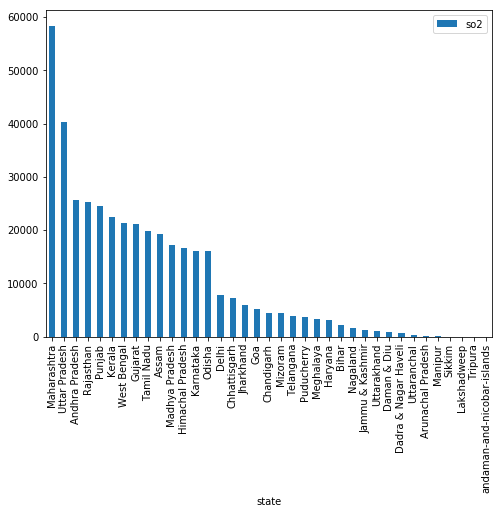

In [11]:
df[['so2','state']].groupby(["state"]).count().sort_values(by='so2',ascending=False).plot.bar()
plt.show()

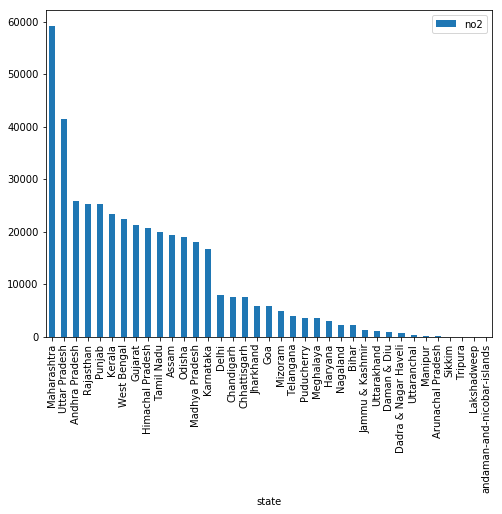

In [12]:
df[['no2','state']].groupby(["state"]).count().sort_values(by='no2',ascending=False).plot.bar()
plt.show()

In [14]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]
df['year'].head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: year, dtype: int64

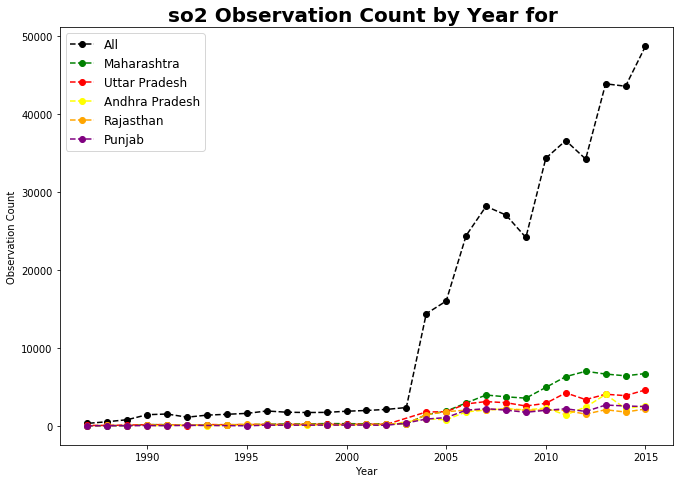

In [15]:
var = "so2"

#Top 5 States for SO2 Level
temp_df = df[[var,'year','state']].groupby(["year"]).count().reset_index().sort_values(by='year',ascending=False)
topstate = df[[var,'state']].groupby(["state"]).count().sort_values(by='so2',ascending=False).index [:5]
state_col = ["green","red","yellow","orange","purple"]

# Plotting the Curves
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('{} Observation Count by Year for '.format(var), fontsize=20,fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Observation Count')
plt.plot(temp_df.year,temp_df["so2"],marker='o', linestyle='--', color='black', label='Square')
for (i,col) in zip(topstate, state_col):
    state_df= df[df.state==i][[var,'year','state']].groupby(["year"])\
    .count().reset_index().sort_values(by='year',ascending=False)
    plt.plot(state_df.year,state_df[var],marker='o', linestyle='--', color=col, label='Square')
plt.legend(topstate.insert(0, "All") , loc=2,fontsize='large')
plt.show()

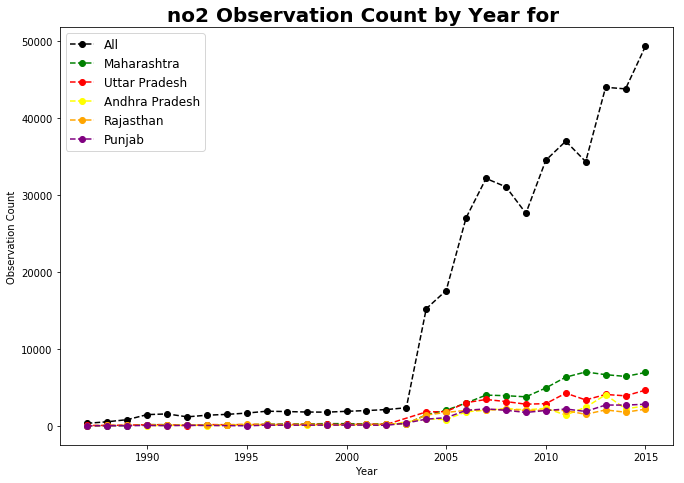

In [16]:
var = "no2"

#Top 5 States for NO2 Level
temp_df = df[[var,'year','state']].groupby(["year"]).count().reset_index().sort_values(by='year',ascending=False)
topstate = df[[var,'state']].groupby(["state"]).count().sort_values(by='no2',ascending=False).index [:5]
state_col = ["green","red","yellow","orange","purple"]

# Plotting the Curves
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('{} Observation Count by Year for '.format(var), fontsize=20,fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Observation Count')
plt.plot(temp_df.year,temp_df["no2"],marker='o', linestyle='--', color='black', label='Square')
for (i,col) in zip(topstate, state_col):
    state_df= df[df.state==i][[var,'year','state']].groupby(["year"])\
    .count().reset_index().sort_values(by='year',ascending=False)
    plt.plot(state_df.year,state_df[var],marker='o', linestyle='--', color=col, label='Square')
plt.legend(topstate.insert(0, "All") , loc=2,fontsize='large')
plt.show()